In [11]:
### Problem 1 ###

using NLsolve, ModelingToolkit

@variables x y

function nonLinRoots(F, x)
    F[1] = 2 * x[1] * x[2] - 2x[1]^2 + 4sin(x[2]) + 4
    F[2] = 3x[1]^2 - 2 * x[1] * x[2]^2 + 5cos(x[1]) + 4
end

ii = -5.0
Eqn1 = 1
Eqn2 = 1
Opt1 = Eqn1^2
Opt2 = Eqn2^2

while 1e-6 < abs(Eqn1) || 1e-6 < abs(Eqn2)
    Eqn1 = 2 * nlsolve(nonLinRoots, [ii;ii]).zero[1] * nlsolve(nonLinRoots, [ii;ii]).zero[2] - 
    2 * nlsolve(nonLinRoots, [ii;ii]).zero[1]^2 + 
    4 * sin(nlsolve(nonLinRoots, [ii;ii]).zero[2]) + 
    4     

    Eqn2 =  3 * nlsolve(nonLinRoots, [ii;ii]).zero[1]^2 - 
    2 * nlsolve(nonLinRoots, [ii;ii]).zero[1] * nlsolve(nonLinRoots, [ii;ii]).zero[2]^2 + 
    5 * cos(nlsolve(nonLinRoots, [ii;ii]).zero[1]) + 
    4

    ii += 1

    if ii == 5
        print("Hit 5 \n")
        break
    end
    x = nlsolve(nonLinRoots, [ii;ii]).zero[1]
    y = nlsolve(nonLinRoots, [ii;ii]).zero[2]
end
print("x0/y0: ",ii,"\n")
print("Equation 1 Solution: ",Eqn1,'\n')
print("Equation 2 Solution: ",Eqn2,"\n")
print("x: ",x, "\n")
print("y: ",y, "\n")


x0/y0: -4.0
Equation 1 Solution: -2.2186350534525445e-9
Equation 2 Solution: -7.4239672187559336e-9
x: 0.5002054899374974
y: -3.022297590041017


In [12]:
### Problem 1 ###

using NLsolve, ModelingToolkit
@variables x y 
function nonLinRoots(F, x)
    F[1] = 2 * x[1] * x[2] - 2x[1]^2 + 4sin(x[2]) + 4
    F[2] = 3x[1]^2 - 2 * x[1] * x[2]^2 + 5cos(x[1]) + 4
end

ii = 0.0
Eqn1 = 1
Eqn2 = 1
Opt1 = Eqn1^2
Opt2 = Eqn2^2
while 1e-6 < abs(Eqn1) || 1e-6 < abs(Eqn2)
    Eqn1 = 2 * nlsolve(nonLinRoots, [ii;ii]).zero[1] * nlsolve(nonLinRoots, [ii;ii]).zero[2] - 
    2 * nlsolve(nonLinRoots, [ii;ii]).zero[1]^2 + 
    4 * sin(nlsolve(nonLinRoots, [ii;ii]).zero[2]) + 
    4     

    Eqn2 =  3 * nlsolve(nonLinRoots, [ii;ii]).zero[1]^2 - 
    2 * nlsolve(nonLinRoots, [ii;ii]).zero[1] * nlsolve(nonLinRoots, [ii;ii]).zero[2]^2 + 
    5 * cos(nlsolve(nonLinRoots, [ii;ii]).zero[1]) + 
    4

    ii += 1

    if ii == 5
        print("Hit 5 \n")
        break
    end
    x = nlsolve(nonLinRoots, [ii;ii]).zero[1]
    y = nlsolve(nonLinRoots, [ii;ii]).zero[2]
end
print("x0/y0: ",ii,"\n")
print("Equation 1 Solution: ",Eqn1,'\n')
print("Equation 2 Solution: ",Eqn2,"\n")
print("x: ",x, "\n")
print("y: ",y, "\n")

x0/y0: 1.0
Equation 1 Solution: -8.881784197001252e-16
Equation 2 Solution: -8.881784197001252e-16
x: 3.292059022325778
y: 2.189700479226726


In [10]:
using ModelingToolkit, GalacticOptim, Optim
### Problem 2 ###

feedOne = parse(Float64, readline())
print("Feed One Mole Frac: ",feedOne ," \n")

feedTwo = feedOne
print("Feed Two Mole Frac: ",feedTwo," \n")

feedThree = feedOne
print("Feed Three Mole Frac: ", feedThree, "\n")

feedFour = feedOne
print("Feed Four Mole Frac: ",feedFour,"\n")

flowRate = parse(Float64, readline())
print("Feed Flow Rate: ", flowRate," \n")
println(" ")
@variables x 
@parameters a1 a2 a3 a4

d = 28
disOne = 0.9
disTwo = 0.07 
disThree = 0.02
disFour = 0.01

objective = 
((a1*flowRate*feedOne)/(a1 - x) + 
(a2*flowRate*feedTwo)/(a2 - x) +
(a3*flowRate*feedThree)/(a3 - x) +
(a4*flowRate*feedFour)/(a4 - x))^2


@named  sys = OptimizationSystem(objective, [x], [a1,a2,a3,a4])

u0 = [ x => 4.1]

paramsDict = Dict([ a1 => 4.9, a2 => 3.6, a3 => 1.6, a4 => 1, d => 28, disOne => .9, disTwo => .07, disThree => .02, disFour => 0.01])
params = [ a1 => 4.9, a2 => 3.6, a3 => 1.6, a4 => 1]

prob = OptimizationProblem(sys,u0, params, grad=true, hess=true)

callback = function (p,l)
    println("Objective function value =  $l")
    return false
end

result = solve(prob, NewtonTrustRegion(), x_abstol = 1e-12, 
                   f_abstol = 1e-12, g_abstol = 1e-12, cb = callback, 
                    show_every = 1, time_limit = 100 , iterations=100)

vaporFlowRate = 
(paramsDict[a1]*paramsDict[disOne]*paramsDict[d]/paramsDict[a1]-result.minimum) +
(paramsDict[a2]*paramsDict[disTwo]*paramsDict[d]/paramsDict[a2]-result.minimum) +
(paramsDict[a3]*paramsDict[disThree]*paramsDict[d]/paramsDict[a3]-result.minimum) +
(paramsDict[a4]*paramsDict[disFour]*paramsDict[d]/paramsDict[a4]-result.minimum) 
println(" ")
println("The minimum vapor flow rate is: ", vaporFlowRate)
println("Final value of objective function = ", result.minimum)
println("Final value for x = ", result.minimizer[1])

Feed One Mole Frac: 0.25 
Feed Two Mole Frac: 0.25 
Feed Three Mole Frac: 0.25
Feed Four Mole Frac: 0.25
Feed Flow Rate: 100.0 
 
Objective function value =  2594.834303459966
Objective function value =  83.49341877511702
Objective function value =  0.015959859935606606
Objective function value =  1.9855963631397665e-10
Objective function value =  7.483450091288606e-26
Objective function value =  2.5843872115945568e-26
 
The minimum vapor flow rate is: 28.0
Final value of objective function = 2.5843872115945568e-26
Final value for x = 4.196455170017252


┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase C:\Users\solid\.julia\packages\SciMLBase\UIp7W\src\integrator_interface.jl:345


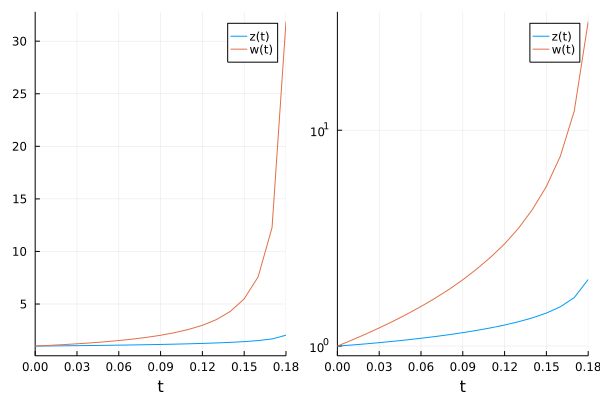

In [24]:
### Problem 4 ###

using ModelingToolkit, OrdinaryDiffEq, Plots
@variables t, z(t), w(t)

Dt = Differential(t)

eqs = [Dt(z) ~ w * z + sqrt(t),Dt(w) ~ 5w^2 + z^2]

init_cond = [z => 1.0, w => 1.0]

t_span = (0.0, 0.5)
@named sys = ODESystem(eqs)

prob = ODEProblem(sys, init_cond, t_span)

result = OrdinaryDiffEq.solve(prob, Tsit5(), saveat=0.01)

plot1 = plot(result, vars=[z,w])

plot2 = plot(result, vars=[z,w], yaxis=:log)

plot(plot1,plot2)